## Generate a ratings matrix of predetermined rank (with/wihout bias)

In [ ]:
from numpy import random as rd
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

In [ ]:
def create_latent_factors(d, l, latent_factor_interval):
  # Creates a d*l matrix of latent factors, sampled uniformly from the interval 'latent_factor_interval'
  M = np.random.uniform(latent_factor_interval[0], latent_factor_interval[1], [d, l])
  return M

In [ ]:
def create_noise(M, error_interval):
  # Creates noise matrix to add to ratings matrix, noise is sampled uniformly from error_interval
  d1, d2 = M.shape
  E = np.random.uniform(error_interval[0], error_interval[1], [d1, d2])
  return E

In [ ]:
def create_bias(length, bias_interval):
  # Creates a numpy array of size [length, 1] of numbers sampled uniformly from bias_interval
  bias = np.random.uniform(bias_interval[0], bias_interval[1], [length, 1])
  return bias

In [ ]:
def create_ratings_matrix(d1, d2, l, latent_factor_interval, error_interval, bias_interval, biased=False):
  U = create_latent_factors(d1, l, latent_factor_interval)
  V = create_latent_factors(d2, l, latent_factor_interval)
  if biased:
    U_bias = create_bias(d1, bias_interval)
    V_bias = create_bias(d2, bias_interval)
    U = np.c_[U, U_bias, np.ones(d1)]
    V = np.c_[V, np.ones(d2), V_bias]
  R = U.dot(V.T)
  R += create_noise(R, error_interval)
  return R

In [ ]:
def create_df_from_matrix(M):
  u, i = M.shape
  user = np.indices([u,i])[0].flatten()
  item = np.indices([u,i])[1].flatten()
  rating = M.flatten()
  df = pd.DataFrame({'user': user, 'item': item, 'rating': rating})
  return df

### Main function

In [ ]:
def main():

  l = 20
  d1, d2 = 2000, 2000
  latent_factor_interval = [-2, 2]
  bias_interval = [-2, 2]
  error_interval = [-0.5, 0.5]

  rd.seed(0)

  biased = False

  R = create_ratings_matrix(d1, d2, l, latent_factor_interval, error_interval, bias_interval, biased)
  df = create_df_from_matrix(R)

  name = f"df_size_{d1}_{d2}_l_{l}_bias.csv" if biased else f"df_size_{d1}_{d2}_l_{l}.csv"
  df.to_csv(name)
  return df, R

df, R = main()

### Descriptive statistics

In [ ]:
print('Min/max rating: ', R.min(), R.max())
print('Global mean rating: ', np.mean(R))
print('Mean rating magnitude: ', np.mean(abs(R)))
print('Median rating magnitude: ', np.median(abs(R)))

Min/max rating:  -29.97354536073192 31.107824912525597
Global mean rating:  -0.0027187809120271405
Mean rating magnitude:  4.773404615434601
Median rating magnitude:  4.032845819518939


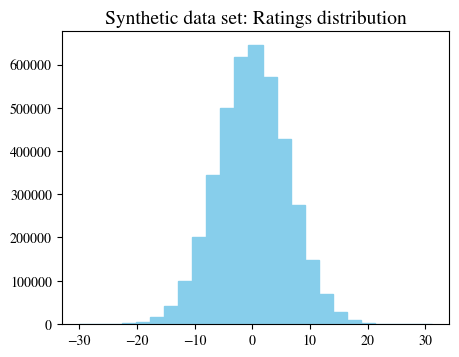

In [ ]:
plt.hist(R.flatten(), bins=25, color = "skyblue", ec="skyblue")
plt.title('Synthetic data set: Ratings distribution', fontsize=14)
fig = plt.gcf()
fig.set_size_inches(5, 3.8)
plt.savefig('synthetic_hist.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()